# Problem Statement

We have to find whether a passenger is survived or not

# Libraries 

In this perticular section we are adding all important libraries

In [66]:
#warning
import warnings
warnings.filterwarnings('ignore')

#data gathering
import os
os.chdir('D:/DATASET/')
import pandas as pd

#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

#split
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

#cross validation
from sklearn.model_selection import GridSearchCV

# Reading CSV file / Data gathering

In this part we are fetching from data sources 

In [3]:
df=pd.read_csv('train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [41]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### 'Survived'

In [4]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

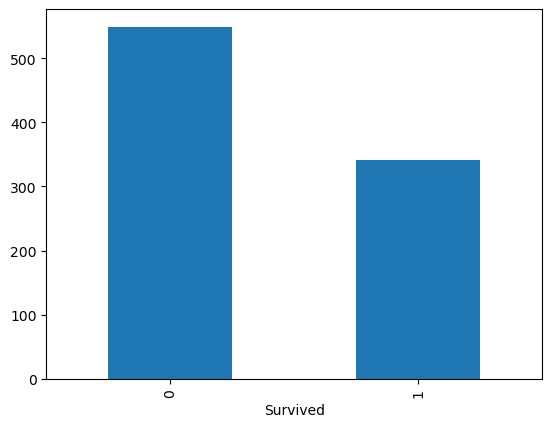

In [6]:
df['Survived'].value_counts().plot(kind='bar')

### pclass

In [7]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<Axes: xlabel='Pclass', ylabel='count'>

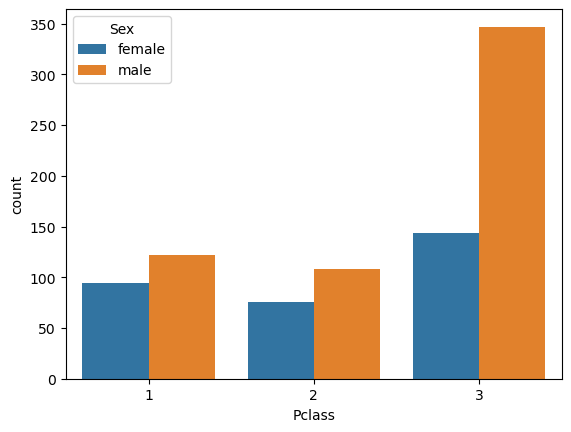

In [9]:
sns.countplot(x=df['Pclass'],hue=df['Sex'])

In [11]:
round(df.groupby(by=['Pclass'])[['Fare']].mean(),2)

,Fare
Pclass,
1,84.15
2,20.66
3,13.68


### Age

In [12]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [18]:
#fig=plt.figure(figsize=(30,25))
#sns.countplot(x=df['Age'])
#plt.savefig('age.png')

<Axes: xlabel='Age', ylabel='Count'>

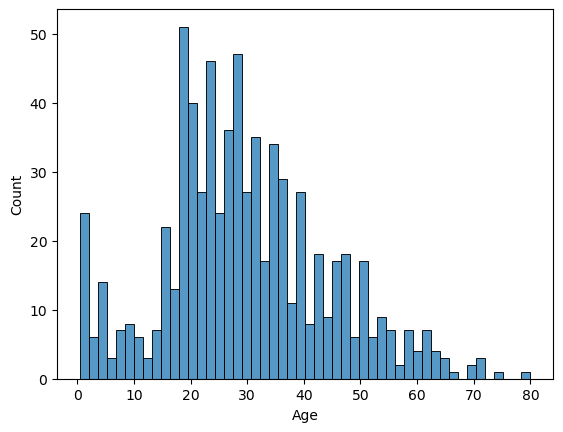

In [24]:
sns.histplot(x=df['Age'],bins=50)

<Axes: xlabel='Age', ylabel='Count'>

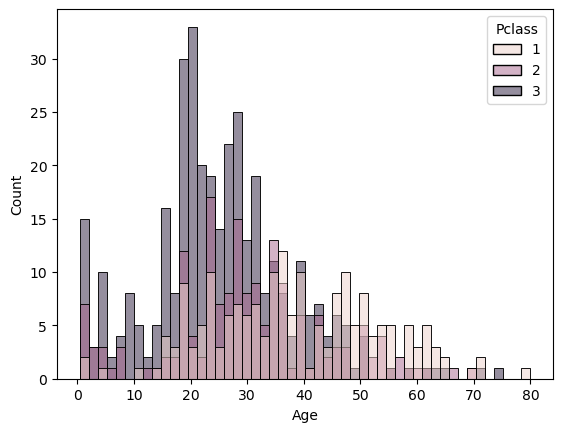

In [25]:
sns.histplot(x=df['Age'],bins=50,hue=df['Pclass'])

<Axes: xlabel='None', ylabel='Age'>

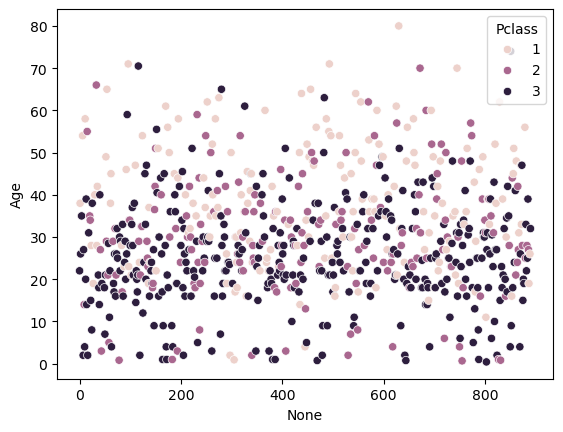

In [27]:
sns.scatterplot(x=df.index,y=df['Age'],hue=df['Pclass'])

In [28]:
df.groupby(by=['Pclass'])[['Age']].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


### Fare

<Axes: xlabel='Pclass', ylabel='Fare'>

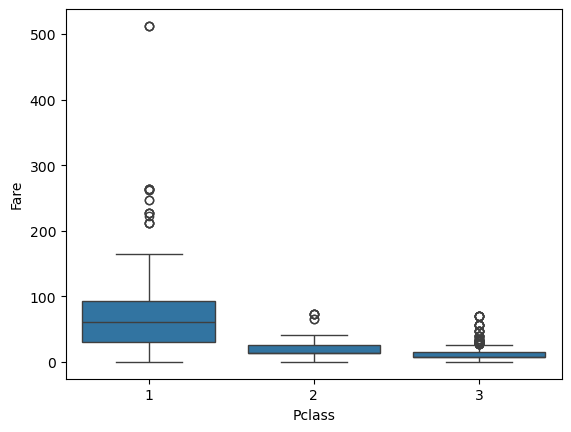

In [29]:
sns.boxplot(x=df['Pclass'],y=df['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

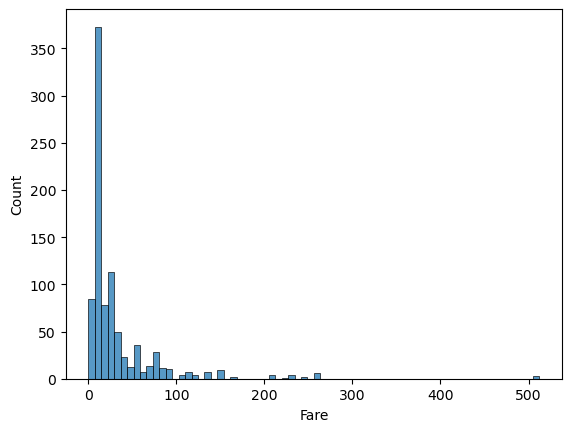

In [32]:
sns.histplot(x=df['Fare'],bins=70)

In [36]:
df.groupby(by=['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

# Feature Selection 

In [37]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [38]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Feature Engineering / Preprocessing 

In [39]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [43]:
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [44]:
cat

['Sex', 'Embarked']

In [45]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [46]:
#pipelines 
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OrdinalEncoder())])

In [47]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])

In [48]:
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OrdinalEncoder())]),
                                 ['Sex', 'Embarked'])])

In [49]:
x1=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())
x1

,num_pipe__Pclass,num_pipe__Age,num_pipe__SibSp,num_pipe__Parch,num_pipe__Fare,cat_pipe__Sex,cat_pipe__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,2.0
...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,1.0,2.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0.0,2.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,0.0,2.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,1.0,0.0


# SPlitting Data into train and test set

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,stratify=y,random_state=23)

# Model Evaluation 

In [55]:
la=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
kn=KNeighborsClassifier()
sv=SVC()

In [56]:
model_list=[la,dt,rf,ab,kn,sv]

In [63]:
for i in model_list:
    #fitting individual model
    i.fit(x_train,y_train)
    
    #prediction
    y_pred_train=i.predict(x_train)
    y_pred=i.predict(x_test)
    
    #error calculation
    tr_f1=round(f1_score(y_pred_train,y_train),2)
    ts_f1=round(f1_score(y_pred,y_test),2)
    
    print('*'*50)
    print(i)
    print('Training F1:',tr_f1)
    print('Testing F1:',ts_f1)
    

**************************************************
LogisticRegression()
Training F1: 0.75
Testing F1: 0.7
**************************************************
DecisionTreeClassifier()
Training F1: 0.97
Testing F1: 0.71
**************************************************
RandomForestClassifier()
Training F1: 0.97
Testing F1: 0.76
**************************************************
AdaBoostClassifier()
Training F1: 0.8
Testing F1: 0.78


C:\Users\admin\anaconda_new\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**************************************************
KNeighborsClassifier()
Training F1: 0.8
Testing F1: 0.73
**************************************************
SVC()
Training F1: 0.77
Testing F1: 0.74


### Adaboost Shows best accuracy for this dataset

# Tuning Adaboost Model

In [64]:
grid={'n_estimators':range(10,300)}

In [67]:
gs=GridSearchCV(ab,param_grid=grid,cv=2)
gs.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': range(10, 300)})

In [68]:
gs.best_params_

{'n_estimators': 14}

In [69]:
ab1=gs.best_estimator_
ab1

AdaBoostClassifier(n_estimators=14)

# Evaluation 

### Training Data Evaluation

In [70]:
y_pred_train1=ab1.predict(x_train)

acc=accuracy_score(y_pred_train1,y_train)
clf=classification_report(y_pred_train1,y_train)
cnf=confusion_matrix(y_pred_train1,y_train)

print('*'*50)
print('Accuracy:',acc)
print('Classification Report:\n',clf)
print('Confusion Matrix:\n',cnf)

**************************************************
Accuracy: 0.8258426966292135
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       455
           1       0.74      0.79      0.77       257

    accuracy                           0.83       712
   macro avg       0.81      0.82      0.81       712
weighted avg       0.83      0.83      0.83       712

Confusion Matrix:
 [[385  70]
 [ 54 203]]


### Testing Data Evaluation

In [71]:
y_pred1=ab1.predict(x_test)

acc1=accuracy_score(y_pred1,y_test)
clf1=classification_report(y_pred1,y_test)
cnf1=confusion_matrix(y_pred1,y_test)

print('*'*50)
print('Accuracy:',acc1)
print('Classification Report:\n',clf1)
print('Confusion Matrix:\n',cnf1)

**************************************************
Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       119
           1       0.68      0.78      0.73        60

    accuracy                           0.80       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.81      0.80      0.81       179

Confusion Matrix:
 [[97 22]
 [13 47]]


# Prediction For New Dataset

In [72]:
df1=pd.read_csv('test_titanic.csv')
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [73]:
x2=pd.DataFrame(pre.transform(df1),columns=pre.get_feature_names_out())

In [75]:
x2            #preprocess new data

,num_pipe__Pclass,num_pipe__Age,num_pipe__SibSp,num_pipe__Parch,num_pipe__Fare,cat_pipe__Sex,cat_pipe__Embarked
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,1.0,1.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,0.0,2.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,1.0,1.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,1.0,2.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,0.0,2.0
...,...,...,...,...,...,...,...
413,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,1.0,2.0
414,-1.566107,0.740711,-0.474545,-0.473674,1.544246,0.0,0.0
415,0.827377,0.702286,-0.474545,-0.473674,-0.502445,1.0,2.0
416,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,1.0,2.0


In [76]:
pred=ab1.predict(x2)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [77]:
Result=df1[['PassengerId']]
Result

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [78]:
Result['Prediction']=pred

In [79]:
Result

,PassengerId,Prediction
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [80]:
#Result.to_csv('Result.csv',index=False)